Project
===

Collaborator 1 – Data Understanding & Cleaning
===

First of all we start loading the data

In [27]:
import pandas as pd

df = pd.read_csv("/home/pol264/Master/SP/coronary disease/coronary_disease.csv")
df.head()


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Now we are going to **inspect the dataset** 

In [28]:
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)





Shape: (4238, 16)

Dtypes:
 sex                 object
age                  int64
education          float64
currentSmoker       object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


We are observing that our dataset has 4238 samples with 16 labels. Most of the labels are integer or float (numeric) whereas sex and currentSmoker are object type

After that, we will check if some columns have NA values:

In [29]:
print("\nMissing per column:\n", df.isna().sum())




Missing per column:
 sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


We are observing that columns education,cigsPerDay,BPMeds,totChol,BMI,heartRate and glucose have NA values.

Finally, we are going to see the class balance for variable TenYearCHD

In [30]:
print("\nClass balance (TenYearCHD):\n", df['TenYearCHD'].value_counts(normalize=True))



Class balance (TenYearCHD):
 TenYearCHD
0    0.848042
1    0.151958
Name: proportion, dtype: float64


We are observing that most of the patients did not develop coronary disease within 10 years (85% for NO and 15% for Yes)

**Renaming Variables**

As we are working 7 members in the project it is good to rename the variable names to a more understandable ones. This ensures that every member understands the variable they are using

In [31]:
rename_map = {
        "sex": "sex",
        "age": "age",
        "education": "education_level",
        "currentSmoker": "current_smoker",
        "cigsPerDay": "cigs_per_day",
        "BPMeds": "bp_meds",
        "prevalentStroke": "prevalent_stroke",
        "prevalentHyp": "prevalent_hypertension",
        "diabetes": "diabetes",
        "totChol": "total_cholesterol",
        "sysBP": "systolic_bp",
        "diaBP": "diastolic_bp",
        "BMI": "bmi",
        "heartRate": "heart_rate",
        "glucose": "glucose",
        "TenYearCHD": "ten_year_chd",
    }
df = df.rename(columns=rename_map)
df.head()


,sex,age,education_level,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hypertension,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Removing NA**

As previously seen, some variables have NA values.


In [32]:
df[df.isna().any(axis=1)].groupby("ten_year_chd").size() / df.groupby("ten_year_chd").size()



ten_year_chd
0    0.137730
1    0.135093
dtype: float64

13% of samples with label 0 are NA

13% of samples with label 1 are NA

In [33]:
df.isna().any(axis=1).sum()


np.int64(582)

As we can see in the code above, if we remove the samples with NA from label 0 and label 1, we don't produce a class imbalance as we are removing the same proportion of samples.
Also, we have 4238 samples so by removing 582 of them we are still having a lot of samples

In [34]:
df = df.dropna().reset_index(drop=True)
print("Shape after removing NAs:", df.shape)


Shape after removing NAs: (3656, 16)


**Analyzing impossible values**

Now we are going to analyze impossible values such as negative age, bmi, cholesterol level...

In [39]:
import pandas as pd

checks = {
    "age_nonpositive": (df["age"] <= 0).sum(),
    "bmi_nonpositive": (df["bmi"] <= 0).sum(),
    "chol_nonpositive": (df["total_cholesterol"] <= 0).sum(),
    "glucose_nonpositive": (df["glucose"] <= 0).sum(),
    "sysbp_nonpositive": (df["systolic_bp"] <= 0).sum(),
    "diabp_nonpositive": (df["diastolic_bp"] <= 0).sum(),
}

checks_table = pd.DataFrame(
    checks.items(),
    columns=["check", "count"]
)

checks_table


,check,count
0,age_nonpositive,0
1,bmi_nonpositive,0
2,chol_nonpositive,0
3,glucose_nonpositive,0
4,sysbp_nonpositive,0
5,diabp_nonpositive,0


No negative (impossible) values are found

**Analyzing outliers**

We are going to create a boxplot per variable to clearly see the outliers.
Note: Outliers are the dots that are outside the box.

Explanation:

-Box = Q1 to Q3

-Whiskers = values within 1.5 × IQR

-Dots = values < Q1 − 1.5·IQR or > Q3 + 1.5·IQR


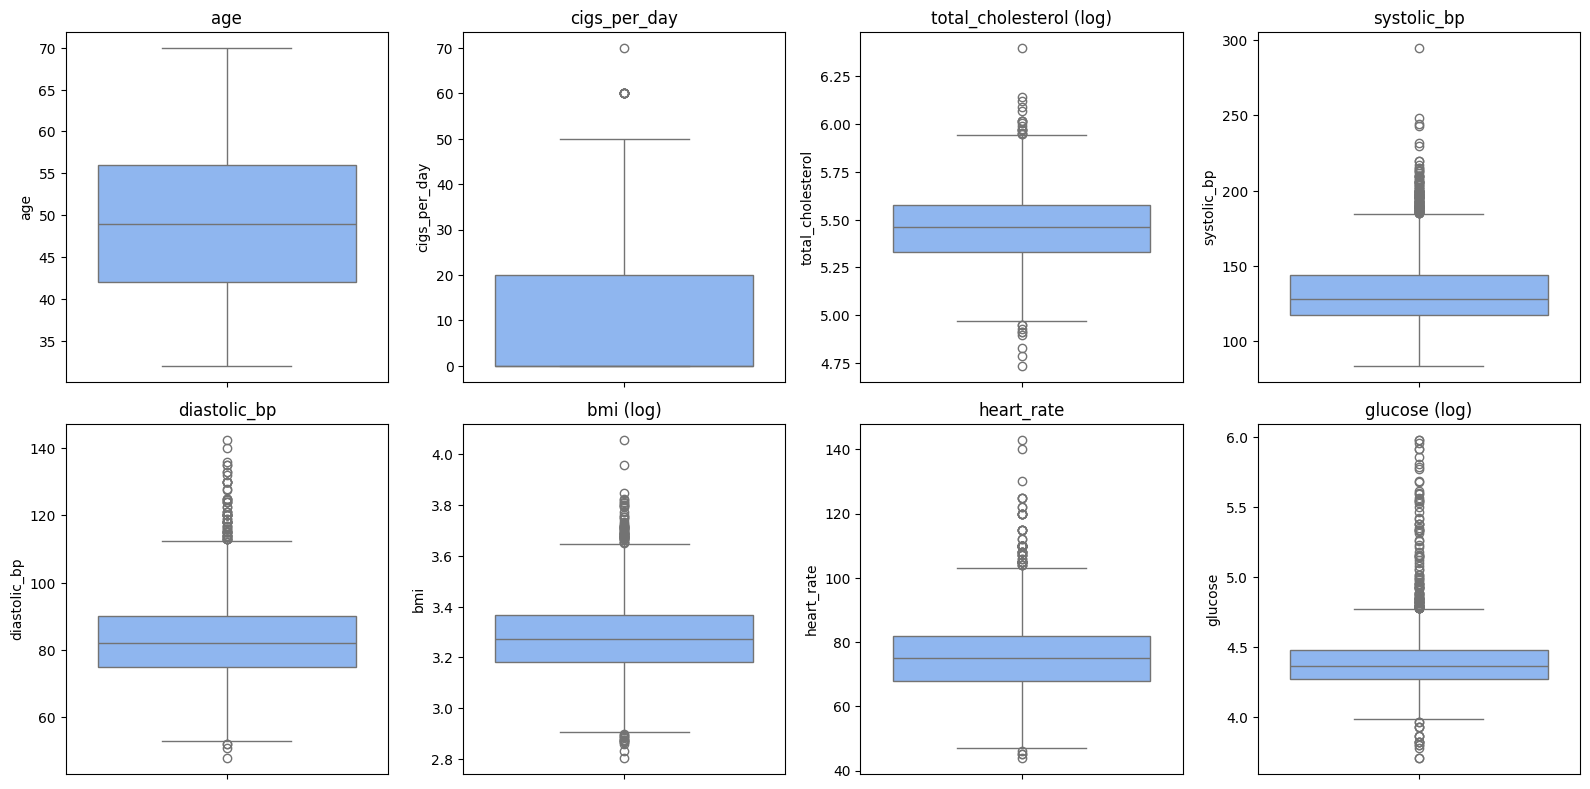

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

log_cols = ["total_cholesterol", "bmi", "glucose"]
num_cols = ["age","cigs_per_day","total_cholesterol","systolic_bp",
            "diastolic_bp","bmi","heart_rate","glucose","cigs_per_day"]

df_plot = df.copy()
for col in log_cols:
    df_plot[col] = np.log1p(df_plot[col])  

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for col, ax in zip(num_cols, axes.flat):
    sns.boxplot(y=df_plot[col], ax=ax, color="#7fb3ff")
    ax.set_title(col + (" (log)" if col in log_cols else ""))
plt.tight_layout()
plt.show()



In the boxplots above we applied logarithm to some variables that had huge values so by applying the log it is more easy to visualize the. As we can see, all samples (except age) have dots in their boxplots, meaning outliers.

To see it in numbers we are going to do the same reasoning as before

In [38]:
num_cols = ["age","cigs_per_day","total_cholesterol","systolic_bp",
            "diastolic_bp","bmi","heart_rate","glucose"]

rows = []
for col in num_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    rows.append({
        "feature": col,
        "low_outliers": (df[col] < lower).sum(),
        "high_outliers": (df[col] > upper).sum(),
        "lower_fence": lower,
        "upper_fence": upper,
    })

iqr_table = pd.DataFrame(rows).set_index("feature")
print(iqr_table)

                   low_outliers  high_outliers  lower_fence  upper_fence
feature                                                                 
age                           0              0       21.000       77.000
cigs_per_day                  0             10      -30.000       50.000
total_cholesterol             2             44      120.125      349.125
systolic_bp                   0            108       76.500      184.500
diastolic_bp                  4             65       52.500      112.500
bmi                           1             84       15.640       35.480
heart_rate                    4             76       47.000      103.000
glucose                       9            166       47.000      111.000


We are seeing that variables as glucose or systolic_bp have more outliers than the others, however, with 3656 samples, this number of outliers is small to deal with it and is expected for clinical variables. As a result, we are not removing any sample

**Summary**

We loaded the coronary dataset, which contains 4,238 rows and 16 columns, and observed that the target variable is imbalanced, with approximately 15% positive cases. To improve clarity and avoid misunderstandings among collaborators, we renamed the variables using more descriptive names. We then removed around 500 rows containing missing values. After cleaning the data, we checked for negative values in variables where they are not physiologically plausible. Finally, we explored the presence of outliers using boxplots and interquartile range (IQR) calculations.